In [54]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import tqdm
from functools import partial
from multiprocessing import Pool
from multiprocessing import Queue
from multiprocessing import Process
sys.path.append('/home/hcleroy/PostDoc/Simulation/Aging_Condensates/Gillespie_backend/')
import Gillespie_backend as backend

In [55]:
ell_tot = 2000.
rho0 = 0.0005
teq = 10000

Nstat = 500

In [68]:
def compute_time_evolution(binding_energy,seed,t_reset):
    S = backend.Gillespie(ell_tot=ell_tot,rho0=rho0,BindingEnergy=binding_energy,seed=seed)
    #print(str(T)+' '+str(seed))
    rho_loop = np.zeros(teq,dtype=float)
    F = np.zeros(teq,dtype=float)
    time = np.zeros(teq, dtype=float)
    for t in range(teq):
        bind, dt = S.evolve()
        if t==0:
            time[t] = dt
        else:
            time[t] = time[t-1]+dt
        if t%t_reset==0 and t!=0:
            S.reset_crosslinkers()
        rho_loop[t] = S.get_N_loop()/S.ell_tot
        F[t] = S.get_F()/S.ell_tot
    return (rho_loop,F,time)

In [69]:
with Pool(10) as p:
    rholoops_F_t = p.starmap(partial(compute_time_evolution,t_reset=teq),
                        zip(-np.linspace(10,100,9),np.array([np.random.randint(100000) for i in range(9)])))

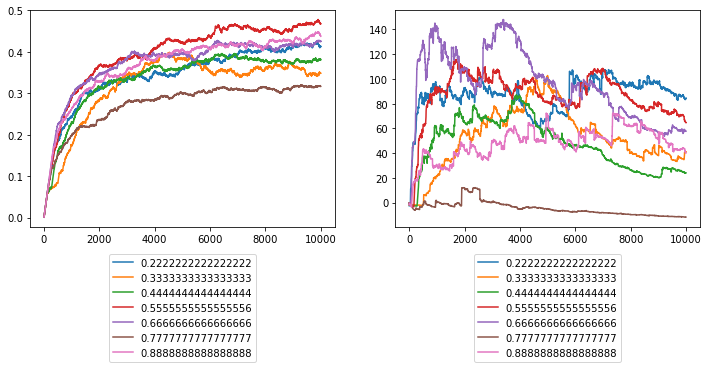

In [70]:
# no reset of crosslinkers
fig,ax = plt.subplots(ncols=2,figsize=(12,4))
for i in range(2,9):
    #fig,ax = plt.subplots()
    ax[0].plot(np.arange(0,teq,1),rholoops_F_t[i][0],label=np.linspace(0,1,10)[i])
#ax2=ax.twinx()
    ax[1].plot(np.arange(0,teq,1),rholoops_F_t[i][1],label=np.linspace(0,1,10)[i])
ax[0].legend(loc=9, bbox_to_anchor=(0.5,-0.1))
ax[1].legend(loc=9, bbox_to_anchor=(0.5,-0.1))

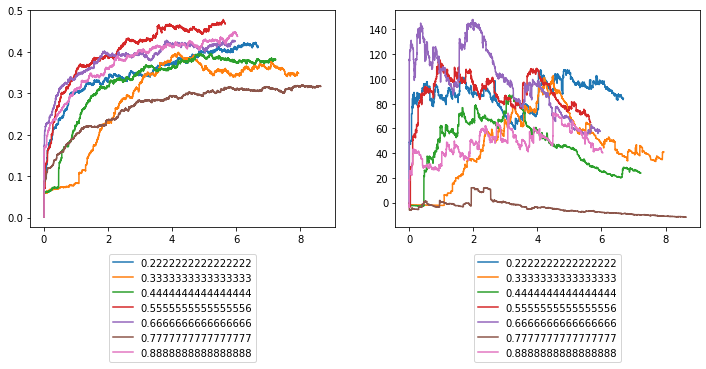

In [74]:
# timescale of the simulation :
E = np.exp(-np.linspace(10,100,9))
# no reset of crosslinkers
fig,ax = plt.subplots(ncols=2,figsize=(12,4))
for i in range(2,9):
    #fig,ax = plt.subplots()
    ax[0].plot(rholoops_F_t[i][2]*E[i],rholoops_F_t[i][0],label=np.linspace(0,1,10)[i])
    #ax2=ax.twinx()
    ax[1].plot(rholoops_F_t[i][2]*E[i],rholoops_F_t[i][1],label=np.linspace(0,1,10)[i])
ax[0].legend(loc=9, bbox_to_anchor=(0.5,-0.1))
ax[1].legend(loc=9, bbox_to_anchor=(0.5,-0.1))

In [75]:
with Pool(10) as p:
    rholoops_F_t = p.starmap(partial(compute_time_evolution,t_reset=teq//10),
                        zip(-np.linspace(10,100,9),np.array([np.random.randint(100000) for i in range(9)])))

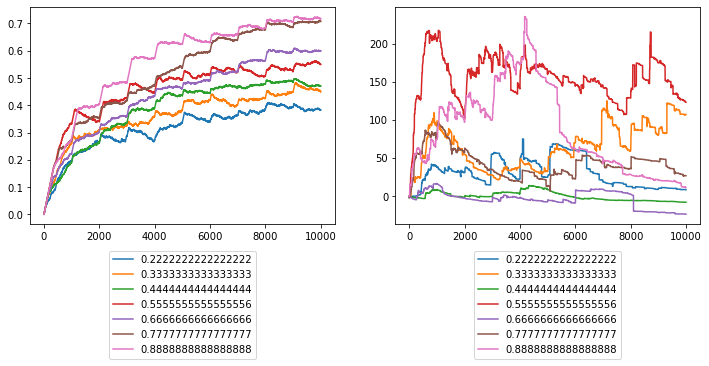

In [76]:
# no reset of crosslinkers
fig,ax = plt.subplots(ncols=2,figsize=(12,4))
for i in range(2,9):
    #fig,ax = plt.subplots()
    ax[0].plot(np.arange(0,teq,1),rholoops_F_t[i][0],label=np.linspace(0,1,10)[i])
#ax2=ax.twinx()
    ax[1].plot(np.arange(0,teq,1),rholoops_F_t[i][1],label=np.linspace(0,1,10)[i])
ax[0].legend(loc=9, bbox_to_anchor=(0.5,-0.1))
ax[1].legend(loc=9, bbox_to_anchor=(0.5,-0.1))

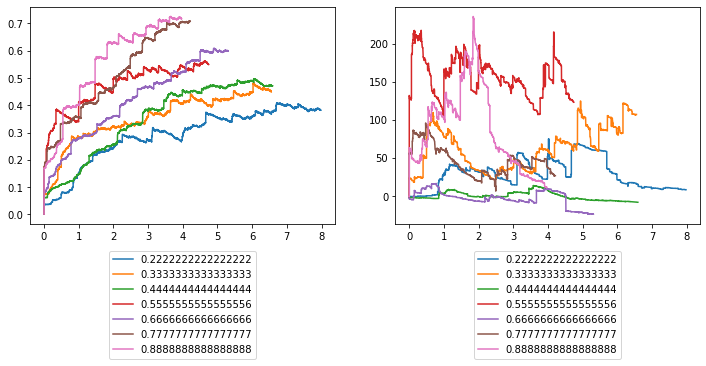

In [77]:
# timescale of the simulation :
E = np.exp(-np.linspace(10,100,9))
# no reset of crosslinkers
fig,ax = plt.subplots(ncols=2,figsize=(12,4))
for i in range(2,9):
    #fig,ax = plt.subplots()
    ax[0].plot(rholoops_F_t[i][2]*E[i],rholoops_F_t[i][0],label=np.linspace(0,1,10)[i])
    #ax2=ax.twinx()
    ax[1].plot(rholoops_F_t[i][2]*E[i],rholoops_F_t[i][1],label=np.linspace(0,1,10)[i])
ax[0].legend(loc=9, bbox_to_anchor=(0.5,-0.1))
ax[1].legend(loc=9, bbox_to_anchor=(0.5,-0.1))

In [78]:
def compute_time_evolution_fixE(seed,t_reset):
    return compute_time_evolution(-50,seed,t_reset)

In [79]:
# look at a specific binding energy and look at the influence of the reset_crosslinkers
with Pool(10) as p:
    Nloops_F = p.starmap(compute_time_evolution_fixE,
                        zip(np.array([np.random.randint(100000) for i in range(10)]),np.array([teq//i for i in range(1,11)])))

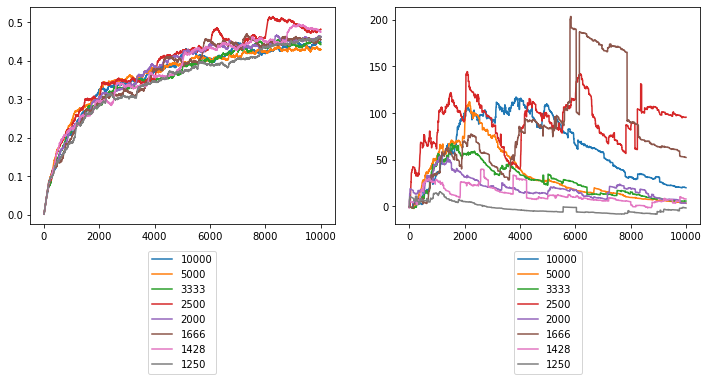

In [80]:
# no reset of crosslinkers
fig,ax = plt.subplots(ncols=2,figsize=(12,4))
for i in range(1,9):
    #fig,ax = plt.subplots()
    ax[0].plot(np.arange(0,teq,1),Nloops_F[i][0],label=teq//i)
#ax2=ax.twinx()
    ax[1].plot(np.arange(0,teq,1),Nloops_F[i][1],label=teq//i)
ax[0].legend(loc=9, bbox_to_anchor=(0.5,-0.1))
ax[1].legend(loc=9, bbox_to_anchor=(0.5,-0.1))

In [81]:
# 10 reset in the simulation
for i in range(1,9):
    plt.plot(np.arange(0,teq,1),Nloops[i],label=np.linspace(0,1,10)[i])
plt.legend(loc=9, bbox_to_anchor=(0.5,-0.1))

NameError: name 'Nloops' is not defined